In [2]:
import os
import cv2
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def detect_ruler(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_red = np.array([0, 120, 70])
    upper_red = np.array([10, 255, 255])
    mask = cv2.inRange(hsv_image, lower_red, upper_red)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    longest_contour = max(contours, key=cv2.contourArea)
    x, y, width, height = cv2.boundingRect(longest_contour)
    ruler_length_pixels = max(width, height)
    return ruler_length_pixels

def detect_circles(image_path, known_ruler_length_units):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred_image = cv2.GaussianBlur(gray_image, (9, 9), 2, 2)
    ruler_length_pixels = detect_ruler(image)
    scale = ruler_length_pixels / known_ruler_length_units
    # circles = cv2.HoughCircles(blurred_image, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=0, maxRadius=0)
    circles = cv2.HoughCircles(blurred_image, cv2.HOUGH_GRADIENT, 1.7, 300, 350)
    circle_sizes = []

    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            radius_units = i[2] / scale
            circle_sizes.append(radius_units)

    return circle_sizes


def get_image_paths(folder_path, extensions=("bmp")):
    # "jpg", "png", "jpeg",
    image_paths = []
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(extensions):
            image_path = os.path.join(folder_path, filename)
            image_paths.append(image_path)
    return image_paths

In [3]:
folder_path = "G:/particle images"
image_paths = get_image_paths(folder_path)
known_ruler_length_units = 1000.0  # 30 centimeters, for example

results = []

# Loop through the image paths and process each image
for index, image_path in enumerate(image_paths):
    circle_sizes = detect_circles(image_path, known_ruler_length_units)
    # results.append({"image_path": image_path, "circle_sizes": circle_sizes})
    results.append(circle_sizes)

    # Print the list of circle sizes for the current image
    print(f"Image {index + 1}: {image_path}")
    print("Detected circle sizes (radius in real-world units):")
    for i, size in enumerate(circle_sizes):
        print(f"  Circle {i + 1}: {size:.2f} units")
    print()

Image 1: G:/particle images\123005.bmp
Detected circle sizes (radius in real-world units):
  Circle 1: 1008.93 units
  Circle 2: 1013.39 units
  Circle 3: 1008.93 units
  Circle 4: 1022.32 units
  Circle 5: 1004.46 units
  Circle 6: 1013.39 units
  Circle 7: 1022.32 units
  Circle 8: 1031.25 units
  Circle 9: 1013.39 units
  Circle 10: 1062.50 units
  Circle 11: 2370.54 units
  Circle 12: 651.79 units

Image 2: G:/particle images\123001.bmp
Detected circle sizes (radius in real-world units):
  Circle 1: 1008.93 units
  Circle 2: 1000.00 units
  Circle 3: 1008.93 units
  Circle 4: 1026.79 units
  Circle 5: 1013.39 units
  Circle 6: 1017.86 units
  Circle 7: 1022.32 units
  Circle 8: 1004.46 units
  Circle 9: 1000.00 units
  Circle 10: 1040.18 units
  Circle 11: 1049.11 units
  Circle 12: 1008.93 units
  Circle 13: 647.32 units
  Circle 14: 830.36 units

Image 3: G:/particle images\123002.bmp
Detected circle sizes (radius in real-world units):
  Circle 1: 1013.39 units
  Circle 2: 1004.4

In [4]:
# Create a single list by concatenating nested lists
concatenated_list = []
for sublist in results:
    concatenated_list.extend(sublist)

# Given the concatenated_list: [1, 2, 3, 4, 5, 6, 7, 8, 9]
# Define the range (inclusive)
lower_bound = 900
upper_bound = 1100

# Remove numbers outside the range using list comprehension
filtered_list = [num for num in concatenated_list if lower_bound <= num <= upper_bound]

# Print the filtered list
print(filtered_list)

[1008.9285714285714, 1013.3928571428571, 1008.9285714285714, 1022.3214285714286, 1004.4642857142857, 1013.3928571428571, 1022.3214285714286, 1031.25, 1013.3928571428571, 1062.5, 1008.9285714285714, 1000.0, 1008.9285714285714, 1026.7857142857142, 1013.3928571428571, 1017.8571428571429, 1022.3214285714286, 1004.4642857142857, 1000.0, 1040.1785714285713, 1049.107142857143, 1008.9285714285714, 1013.3928571428571, 1004.4642857142857, 1017.8571428571429, 1031.25, 1017.8571428571429, 1008.9285714285714, 991.0714285714286, 1040.1785714285713, 982.1428571428571, 1013.3928571428571, 1004.4642857142857, 1004.4642857142857, 1017.8571428571429, 1017.8571428571429, 1026.7857142857142, 1013.3928571428571, 1013.3928571428571, 1026.7857142857142, 1017.8571428571429, 955.3571428571429, 1031.25, 1008.9285714285714, 1008.9285714285714, 1013.3928571428571, 1004.4642857142857, 1031.25, 1031.25, 1040.1785714285713, 1004.4642857142857, 1000.0, 1008.9285714285714, 1022.3214285714286, 1013.3928571428571, 1040.1

In [5]:
# Calculate the mean (average)
mean = statistics.mean(filtered_list)

# Calculate the standard deviation
std_dev = statistics.stdev(filtered_list)

# Print the results
print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")

Mean: 1011.8935602613947
Standard Deviation: 18.717508706294836


In [7]:
# Create a pandas DataFrame from the list
data = {"Values": filtered_list}
df = pd.DataFrame(data)

# Save the DataFrame to an Excel file
excel_file = "G:/particle images/filtered_list.xlsx"
df.to_excel(excel_file, index=False, engine='openpyxl')

C:\Users\jeffr\AppData\Local\Temp\ipykernel_23820\2872948718.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(filtered_list, hist=False, kde=True, hist_kws={'edgecolor': 'black'})


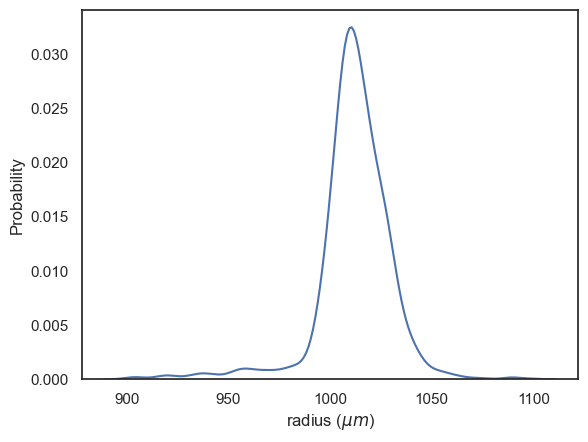

In [18]:
# Set the style for the plot
sns.set(style='white')

# Check the installed version of seaborn
seaborn_version = sns.__version__.split(".")[0]

# Create a normalized distribution plot using the appropriate function
if int(seaborn_version) >= 1:
    # Use histplot() for seaborn v0.11.0 and later
    ax=sns.histplot(filtered_list, kde=True, stat='density', linewidth=1)
else:
    # Use distplot() for seaborn v0.10.x and earlier
    ax=sns.distplot(filtered_list, hist=False, kde=True, hist_kws={'edgecolor': 'black'})

# Set plot title and labels
# plt.title("Normalized Number Distribution")
plt.xlabel("radius ($\mu m$)")
plt.ylabel("Probability")
# plt.style.use(grayscale)
# Show the plot
plt.show()